# QUESTION 4

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Preparation of dataset

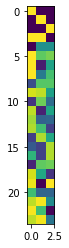

In [2]:
# Create input dataset of colors

X = np.array([255,0,0,0,255,0,0,0,255,255,255,0,
             0,128,128,255,192,203,255,20,147,255,105,180,
             60,188,188,239,230,145,38,199,91,230,24,148,
             219,80,85,225,178,49,49,225,154,72,49,225,
             166,49,225,27,193,199,239,152,38,248,1,255,
             176,83,83,230,252,122,252,177,4,230,250,99])
X=X.reshape([24,3])
X = X/255
plt.imshow(X)

### Self-Organizing Map model

In [53]:
class SOM(object):
    """
    SOM: unsupervised clustering of given input of colors
    - 10000 Neurons are placed in 100 x 100 Grid 
    """
    def __init__(self,featureSize,x_gridDim,y_gridDim,sig):

        np.random.seed(42)
        # Dimensionality of grid and fearures
        self.featureSize = featureSize
        self.x_gridDim = x_gridDim
        self.y_gridDim = y_gridDim
        # Sigma value that affects the radius of Neighbourhood of the winning node
        self.sig=sig
        # Initialize weights of the 100 x 100 x 3 connections randomly
        self.weights = np.random.uniform(0,1,size=(self.x_gridDim,
                                 self.y_gridDim,self.featureSize))

    def getWeight(self):
        return self.weights
    
    def N_func(self,dist,k):
        # Neighbourhood function 
        return np.exp(-dist**2/(2*self.sigma(k)**2))
    
    def lr_func(self,k):
        # Decaying learning rate
        return 0.8*np.exp(-k/self.epochs)
    
    def sigma(self,k):
        # Radius parameter that affects the area of neighbouhood 
        return self.sig*np.exp(-k/self.epochs)
                              
    def updateWeights(self,x,epochs):
        """
        The weights are initialized randomly.Now, this function updates the weights based on the following steps,
        STEP 1: One input from the 24 inputs is taken and the distance between that input and all nodes are found.
        STEP 2: Index of the node that corresponds to minimum distance is found.
        STEP 3: Now, Distance of all other nodes from the min_index_node is found which is the 
        parameter of Neighbourhood function that updates the weights.
        STEP 4: the nodes that closer to min_index_node are updated more and it decreases as the distance increases.
        STEP 5: Repeat for given no of epochs with varying SPREAD PARAMETER.
        """
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
        count =0
        self.epochs=epochs # Total no of epochs
        for k in range(self.epochs+1):
            new_lr = self.lr_func(k) # updated learning rate each epoch
            for index,inp in enumerate(x):
                grid= np.indices((100,100)) # 100 x 100 grid that contains indicies as its values
                Edist = np.linalg.norm(inp-self.weights,axis=2)**2 # Euclidean distance between input and all other neurons
                index_minEdist = np.where(Edist == np.amin(Edist)) # index of the node that corresponds to minimum distance
                # Distance of the indcies from the min_index_node
                grid[0]=index_minEdist[0]-grid[0] 
                grid[1]=index_minEdist[1]-grid[1]
                d=np.linalg.norm(grid, axis=0)
                #Update the Neighbourhood weights 
                self.weights = self.weights + new_lr*np.dstack([self.N_func(d,k)]*3)*(inp-self.weights)
            if (k == 20 or k==40 or k==100 or k==1000):
                plt.sca(axs[count])
                plt.title("Epoch "+str(k) + "& Sigma "+ str(self.sig))
                plt.imshow(self.weights)
                count = count + 1
        plt.show()

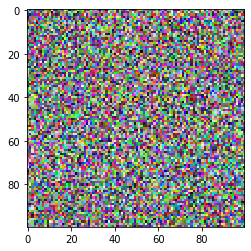

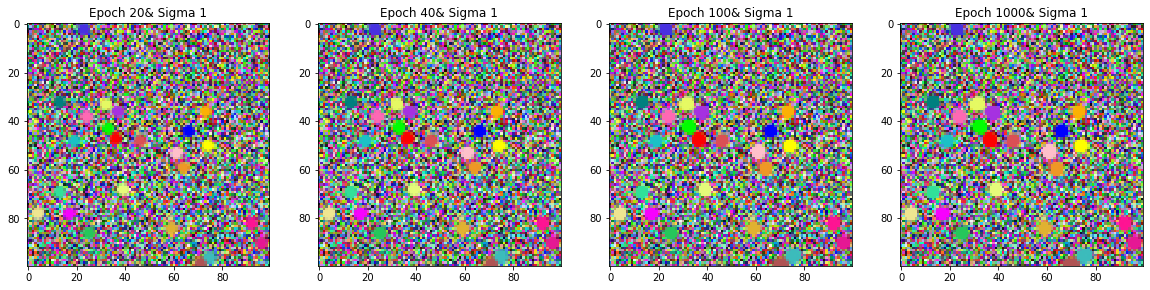

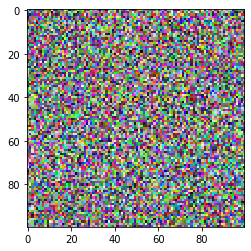

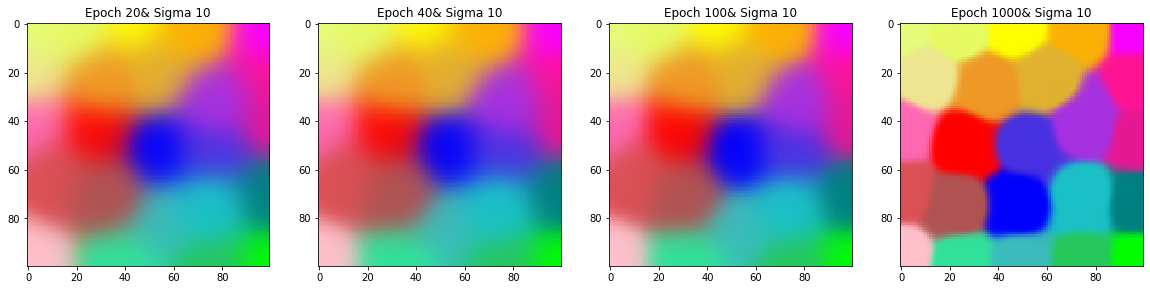

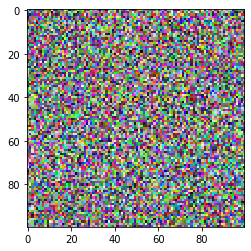

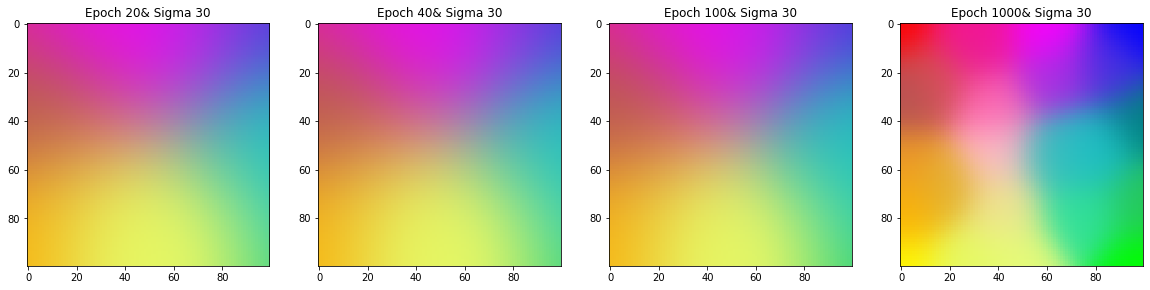

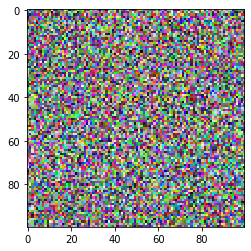

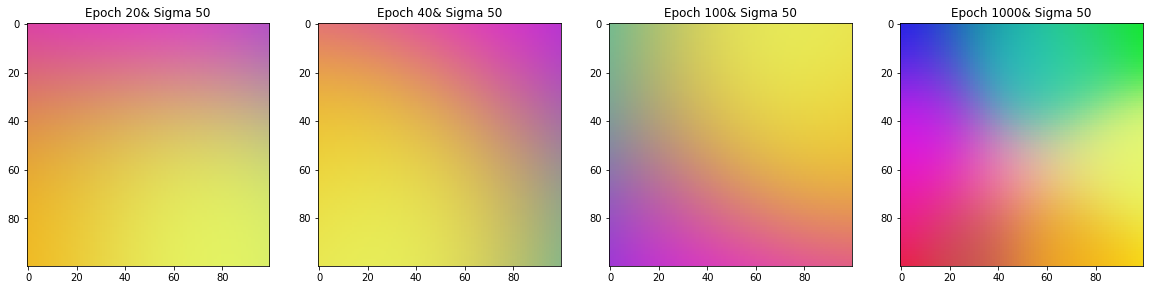

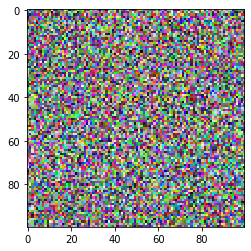

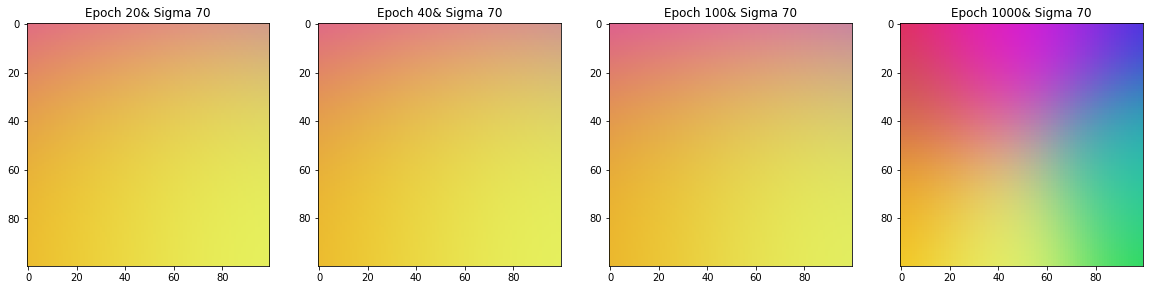

In [55]:
n_features = 3
n_xGrid = 100
n_yGrid = 100
sigma = [1,10,30,50,70]
epochs =1000

for sig in sigma:
    f_map = SOM(n_features,n_xGrid, n_yGrid,sig)
    plt.imshow(f_map.getWeight())
    plt.show()
    f_map.updateWeights(X,epochs)

## Infernece
 
The analysis made for 24 color inputs with shades of RED,BLUE,GREEN along with mix of TEAL,YELLOW and PINK.  
        The weights are initialized randomly.Now, this function updates the weights based on the following steps,  
        STEP 1: One input from the 24 inputs is taken and the distance between that input and all nodes are found.  
        STEP 2: Index of the node that corresponds to minimum distance is found.  
        STEP 3: Now, Distance of all other nodes from the min_index_node is found which is the
        parameter of Neighbourhood function that updates the weights.  
        STEP 4: the nodes that closer to min_index_node are updated more and it decreases as the distance increases.  
        STEP 5: Repeat for given no of epochs with varying SPREAD PARAMETER.  
**How does Epochs affect?**
- Neighbourhood function and learning rate are dependant on nth epoch. As the epochs increases, the neighbour hood radius and learning rate decreases. Therfore, the colors start to blend into each other that smoothens in the boundary.  
**How does Sigma value affect?**  
This is nothing but radius of the affected neighbourhood weights.
- Initially, when $\sigma=1$ the radius is small and the neighbourhood is affected in closer vicinity. the colors are concentrated into small chuncks.
- As the $\sigma$ vlaue increases, the neighbourhood region becomes bigger in size, so does the color clusters.  
  
The combination of **Epochs + SigmaValue** make the feature map more blended adn smoother in nature.